In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers
from sklearn.metrics import confusion_matrix , classification_report

In [4]:
(x_train , y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
indexes = [int(np.where(y_train==i)[0][0]) for i in range(10)]
indexes

[29, 4, 6, 9, 3, 27, 0, 7, 8, 1]

In [6]:
x_train[0].shape

(32, 32, 3)

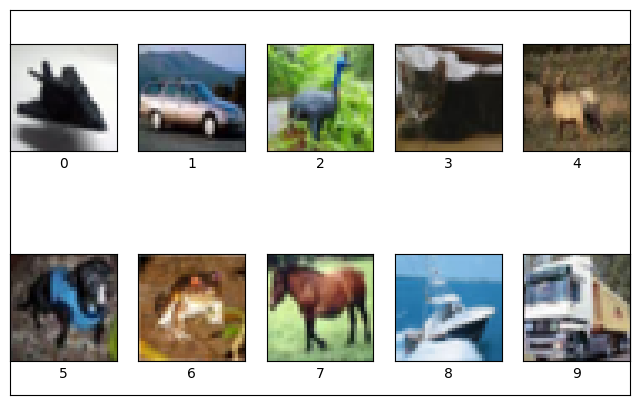

In [10]:
plt.figure(figsize=(8,5))
plt.xticks([])
plt.yticks([])
for i in range(10):
  plt.subplot(2,5,i+1)
  c = indexes[i]
  plt.grid(False)
  plt.yticks([])
  plt.xticks([])
  plt.imshow(x_train[c])
  plt.xlabel(i)
plt.show()


In [5]:
x_train  = x_train/255
x_test = x_test/255

In [17]:
model = Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(units = 2000,activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train , epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 181s 116ms/step - accuracy: 0.3576 - loss: 1.7776
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 179s 115ms/step - accuracy: 0.4035 - loss: 1.6539
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 115ms/step - accuracy: 0.4271 - loss: 1.5903
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 179s 115ms/step - accuracy: 0.4434 - loss: 1.5458
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - accuracy: 0.4567 - loss: 1.5140


In [27]:
y_pred = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [34]:
y_pred_class= [int(np.argmax(i)) for i in y_pred]

In [35]:

report = classification_report(y_test,y_pred_class)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.60      0.55      1000
           1       0.62      0.54      0.58      1000
           2       0.35      0.31      0.33      1000
           3       0.32      0.28      0.30      1000
           4       0.39      0.42      0.41      1000
           5       0.38      0.34      0.36      1000
           6       0.41      0.62      0.49      1000
           7       0.56      0.47      0.51      1000
           8       0.67      0.50      0.57      1000
           9       0.51      0.59      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



In [6]:
model2 = Sequential([
    #cnn
    #layer 1
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #layer 2
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', ),
    layers.MaxPooling2D((2,2)),

    #rnn
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(units = 2000,activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10,activation='softmax')
])


model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model2.fit(x_train,y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.4217 - loss: 1.5891
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6583 - loss: 0.9665
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7539 - loss: 0.7151
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8291 - loss: 0.4872
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8916 - loss: 0.3056
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9387 - loss: 0.1777
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9552 - loss: 0.1305
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9639 - loss: 0.1100
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9692 - loss: 0.0932
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9739 - loss: 0.0792


In [8]:
y_pred = model2.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.62695892e-07, 6.61091884e-12, 1.05158804e-09, ...,
        1.99627248e-08, 2.05127360e-09, 7.69179859e-12],
       [3.10570567e-06, 1.52848152e-04, 1.07830962e-14, ...,
        2.23001879e-15, 9.99844074e-01, 1.54260693e-08],
       [1.00301528e-04, 4.92028659e-04, 1.39769043e-07, ...,
        5.85172195e-08, 9.99381423e-01, 2.41750458e-05],
       ...,
       [3.77088716e-09, 1.03507316e-11, 8.17673981e-01, ...,
        4.53061803e-04, 1.42603672e-11, 2.64721600e-09],
       [7.22863149e-07, 9.99990702e-01, 3.89886012e-10, ...,
        2.83235631e-12, 3.79255427e-09, 6.88400874e-08],
       [2.40693301e-22, 1.13721615e-20, 2.95984590e-21, ...,
        1.00000000e+00, 8.17115992e-26, 2.23421403e-24]], dtype=float32)

In [9]:
y_pred_classes = [int(np.argmax(i)) for i in y_pred]
y_pred_classes

[3,
 8,
 8,
 0,
 3,
 6,
 5,
 2,
 5,
 9,
 4,
 9,
 5,
 7,
 9,
 8,
 5,
 2,
 8,
 6,
 7,
 2,
 0,
 9,
 4,
 4,
 4,
 0,
 9,
 6,
 3,
 5,
 3,
 5,
 9,
 3,
 5,
 9,
 9,
 3,
 4,
 6,
 5,
 6,
 8,
 9,
 2,
 7,
 7,
 6,
 9,
 0,
 5,
 3,
 8,
 8,
 5,
 3,
 5,
 5,
 7,
 5,
 6,
 2,
 6,
 2,
 6,
 0,
 9,
 3,
 8,
 6,
 8,
 8,
 0,
 2,
 0,
 3,
 5,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 3,
 8,
 9,
 0,
 2,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 3,
 2,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 2,
 2,
 9,
 3,
 0,
 4,
 5,
 7,
 0,
 4,
 9,
 2,
 1,
 0,
 8,
 3,
 3,
 0,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 6,
 5,
 6,
 3,
 8,
 7,
 6,
 5,
 3,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 5,
 4,
 0,
 1,
 5,
 6,
 0,
 2,
 8,
 4,
 5,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 6,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 0,
 8,
 5,
 3,
 5,
 8,
 5,
 3,
 7,
 7,
 7,
 3,
 8,
 8,
 7,
 8,
 5,
 9,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 0,
 3,
 7,
 8,
 0,
 7,
 9,
 0,
 2,
 7,
 3,
 9,
 7,
 3,
 9,
 2,
 4,
 7,
 3,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 7,
 5,
 5,
 1,
 1,
 0,
 3,
 0,
 8,
 1,
 8,
 2,
 6,


In [10]:
report = classification_report(y_test, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1000
           1       0.85      0.81      0.83      1000
           2       0.61      0.61      0.61      1000
           3       0.50      0.51      0.51      1000
           4       0.74      0.53      0.62      1000
           5       0.57      0.62      0.60      1000
           6       0.76      0.77      0.77      1000
           7       0.71      0.80      0.75      1000
           8       0.81      0.80      0.81      1000
           9       0.82      0.75      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

